In [1]:
#Packages
import openpyxl
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
#Helper functions
def plot_scatter(dataframe, guide, title, xlabel, ylabel, legend_label):
    """Plots a dataframe into a scatter plot both one of the dimensions of the colous measurement"""
    i = 0 #Counter used for the fiber number in the legend
    if guide == 'x': #Guide selector using strings
        for index, row in dataframe.iterrows():
            if index % 2 != 0: 
                i+= 1
                plt.scatter(list(element + 1 for element in list(range(dataframe.shape[1]))), dataframe.iloc[index], label=legend_label + f'{i}')
    elif guide == 'y':
        for index, row in dataframe.iterrows():
            if index % 2 == 0: 
                i+= 1
                plt.scatter(list(element + 1 for element in list(range(dataframe.shape[1]))), dataframe.iloc[index], label=legend_label + f'{i}')
    else: 
        raise Exception('Select the fiber x or y')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def RyR(dataframe):
    """Calculates and prints the RyR values for both fibers, including a cualitative evaluation"""
    i = 0; df_RyR = [] #Preallocate a counter and an empty dataframe where to add the rows
    std = dataframe.iloc[:, :-2].std(axis=1) #Standard deviation for each row, excluding limits
    for index, _ in enumerate(range(dataframe.shape[0])):
        i+= 1
        RyR = (6*std.iloc[index]/(dataframe.iloc[index,-1]-dataframe.iloc[index,-2]))*100 #Calculates RyR for the whole dataframe
        df_RyR.append(float(RyR)) #Adds the values of RyR to a ndarray
    df_RyR = pd.DataFrame(df_RyR) #Builds a new dataframe with the RyR values
    x_fiber = df_RyR[df_RyR.index % 2 != 0] #Indexes the fiber x RyR values in a new dataframe
    y_fiber = df_RyR[df_RyR.index % 2 == 0] #Indexes the fiber y RyR values in a new dataframe
    dfx = pd.DataFrame(x_fiber).reset_index(drop=True) #Resets row index
    dfy = pd.DataFrame(y_fiber).reset_index(drop=True) #Resets row index
    for i, _ in enumerate(range(dfx.shape[0])): #Prints the dataframe for fiber x row by row indexing with the counter
        Pass = "Correct" if dfx.iloc[i, 0] <= 10 else ("Low fail" if 10 <= dfx.iloc[i, 0] <= 25 else "High fail")
        print(f'RyR Guide fbx {dfx.index[i]+1}: ' + str(dfx.iloc[i, 0]) +' %' + ' Status: ' + Pass)
    print("")
    for i, _ in enumerate(range(dfy.shape[0])): #Prints the dataframe for fiber y row by row
        Pass = "Correct" if dfy.iloc[i, 0] <= 10 else ("Low fail" if 10 <= dfy.iloc[i, 0] <= 25 else "High fail")
        print(f'RyR Guide fby {dfy.index[i]+1}: ' + str(dfy.iloc[i, 0]) +' %' + ' Status: ' + Pass)
    return dfx, dfy

def z_score_filter(dataframe, threshold):
    """Applies a z-score to a Dataframe, filtering values that don't apply."""
    rows = []
    MEAS = dataframe.iloc[:, :-2] #Indexes the measurements
    limits = dataframe.iloc[:, -2:]  #Indexes the limits  
    for row in range(MEAS.shape[0]): #Iterates over the rows
        row = MEAS.iloc[row, :]
        z_scores = (row - row.mean()) / row.std() #Calculates the z-score
        filtered_row = np.where(abs(z_scores) <= threshold, row, np.nan) #Applies the threshold as a filter
        rows.append(filtered_row)
    filtered_df = pd.DataFrame(rows) #Builds a new dataframe
    filtered_df = pd.concat([filtered_df, limits], axis=1) #Adds again the columns
    return filtered_df

Data Extraction and visualization

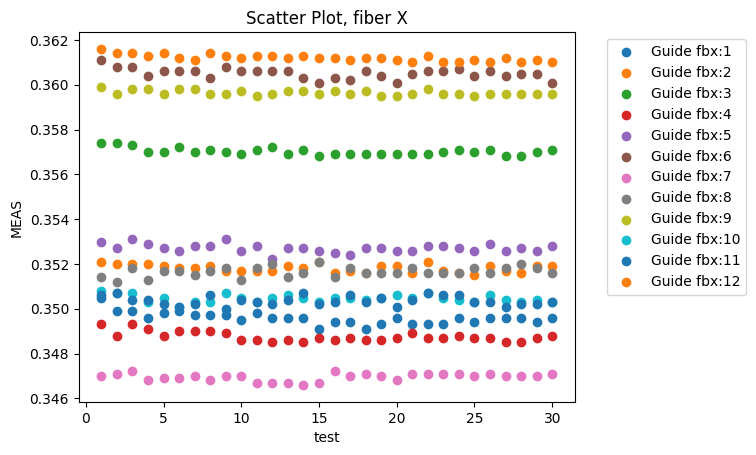

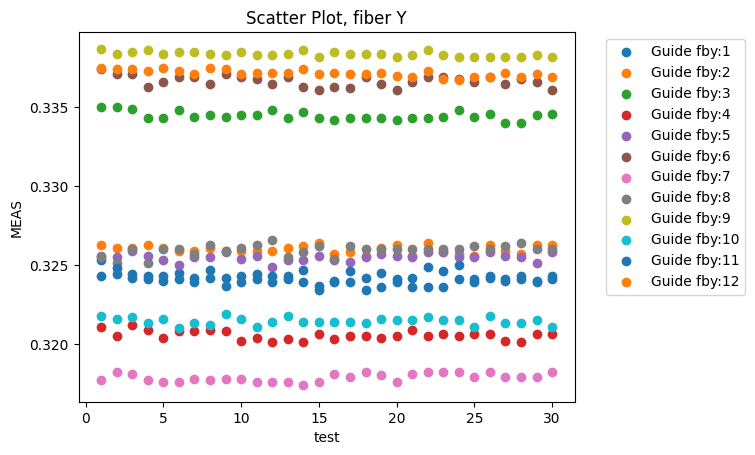

In [5]:
#Import the data from a prepocessed working sheet
data = pd.read_excel("./2_Results/Target.xlsx", header=None)
#Slice the measure from the data
df = data.iloc[3:, 1:-2] #Slices the dataframe, deleting the first empty rows and the columns for tags and df_plus_limits
df = df.reset_index(drop=True) #Resets the rows index to start in zero again
df.columns = range(df.shape[1]) #Resets the columns index to start in zero again
#Plot the measures for each scale
plot_scatter(df, 'x', 'Scatter Plot, fiber X', 'test', 'MEAS', 'Guide fbx:')
plot_scatter(df, 'y', 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Guide fby:')

In [3]:
resume = df.transpose().describe() #Transpose the df first due to describe() working in columns.
df.transpose().describe() #This second call allows for a nicer output in jupiter.

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.324053,0.349580,0.326007,0.351810,0.334463,0.357020,0.320550,0.348763,0.325503,0.352710,...,0.325947,0.351650,0.338373,0.359647,0.321453,0.350467,0.324267,0.350363,0.337160,0.361203
std,0.000381,0.000276,0.000253,0.000169,0.000265,0.000161,0.000285,0.000217,0.000250,0.000186,...,0.000344,0.000213,0.000146,0.000104,0.000232,0.000163,0.000333,0.000201,0.000218,0.000152
min,0.323400,0.349100,0.325600,0.351500,0.334000,0.356800,0.320100,0.348500,0.324900,0.352200,...,0.325100,0.351200,0.338200,0.359500,0.321000,0.350100,0.323700,0.350000,0.336700,0.361000
25%,0.323900,0.349400,0.325825,0.351700,0.334300,0.356900,0.320400,0.348600,0.325325,0.352600,...,0.325850,0.351600,0.338225,0.359600,0.321300,0.350300,0.324025,0.350200,0.337025,0.361100
50%,0.324100,0.349600,0.326000,0.351800,0.334400,0.357000,0.320500,0.348700,0.325500,0.352700,...,0.326000,0.351600,0.338400,0.359600,0.321450,0.350500,0.324200,0.350300,0.337200,0.361200
75%,0.324275,0.349700,0.326275,0.351900,0.334600,0.357100,0.320750,0.348875,0.325600,0.352800,...,0.326175,0.351800,0.338500,0.359700,0.321600,0.350575,0.324450,0.350575,0.337300,0.361300
max,0.325300,0.350500,0.326400,0.352100,0.335000,0.357400,0.321200,0.349300,0.325900,0.353100,...,0.326600,0.352100,0.338700,0.359900,0.321900,0.350800,0.325000,0.350700,0.337500,0.361600


In [4]:
largest = resume.loc['std'].sort_values(ascending=False)[:5]  #Filter the 5 largest values
index = largest.index.tolist()  #Get the index in a list format
for i in range(largest.shape[0]): #Differentiate between x-fibers (odds) and y-fibers
    if index[i] % 2 == 0:
        index[i] = f"fiber x {index[i]+1}:"
    else:
        index[i] = f"fiber y {index[i]+1}:"
largest.index = index
print("Fibers with largest deviation:")
print(largest)

Fibers with largest deviation:
fiber x 1:     0.000381
fiber x 15:    0.000344
fiber x 11:    0.000337
fiber x 21:    0.000333
fiber x 7:     0.000285
Name: std, dtype: float64


RyR calculation

In [5]:
#Slice the dataframe to obtain only the measures and limits for each fiber
df_plus_limits = pd.concat([df, data.iloc[3:, -2:].reset_index(drop=True)], axis=1) #Reset the index to avoid index mismatching
df_plus_limits = df_plus_limits.reset_index(drop=True) #Resets the rows index to start in zero again
df_plus_limits.columns = range(df_plus_limits.shape[1]) #Resets the columns index to start in zero again
#Generate a RyR for each fiber in every scale
RyRx, RyRy = RyR(df_plus_limits)

RyR Guide fbx 1: 5.016927742985813 % Status: Correct
RyR Guide fbx 2: 3.0703724908924808 % Status: Correct
RyR Guide fbx 3: 2.5358260196754747 % Status: Correct
RyR Guide fbx 4: 3.9513523182532593 % Status: Correct
RyR Guide fbx 5: 3.388075244367926 % Status: Correct
RyR Guide fbx 6: 3.5993599583869176 % Status: Correct
RyR Guide fbx 7: 2.966517821483812 % Status: Correct
RyR Guide fbx 8: 3.8716954488095707 % Status: Correct
RyR Guide fbx 9: 1.6447277676702603 % Status: Correct
RyR Guide fbx 10: 2.9562530231568975 % Status: Correct
RyR Guide fbx 11: 3.651483716701151 % Status: Correct
RyR Guide fbx 12: 2.3993742617267664 % Status: Correct

RyR Guide fby 1: 9.149426211517149 % Status: Correct
RyR Guide fby 2: 6.075933304212658 % Status: Correct
RyR Guide fby 3: 5.473518788659151 % Status: Correct
RyR Guide fby 4: 6.839237707068918 % Status: Correct
RyR Guide fby 5: 5.99530851065486 % Status: Correct
RyR Guide fby 6: 6.982461349201227 % Status: Correct
RyR Guide fby 7: 5.935376117414217 

Distribution Fitting

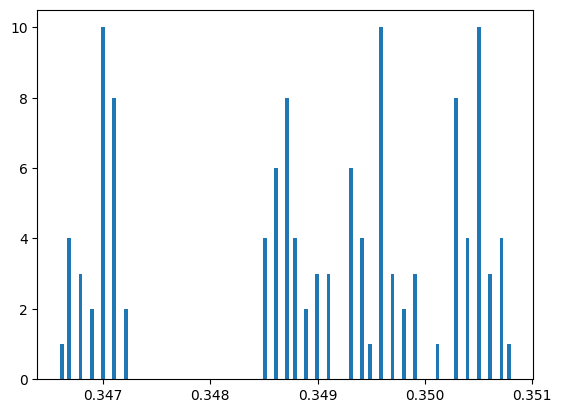

In [6]:
array = df.values #Creates a ndarray with the values of the dataframe
fbx_low = array[0::6].reshape(-1, 1) #Index and reshapes the values for every position
fby_low = array[1::6].reshape(-1, 1)
fbx_medium = array[2::6].reshape(-1, 1)
fby_medium = array[2::6].reshape(-1, 1)
fbx_high = array[4::6].reshape(-1, 1)
fby_high = array[5::6].reshape(-1, 1)
values = np.concatenate([[fbx_low], [fby_low], [fbx_medium], [fby_medium], [fbx_high], [fby_high]]).reshape(6, 120)
plt.hist(values[np.random.randint(1, 6), :], 120)
plt.show()

Filtering

![title](./3_Extra/Z-score.jpg)

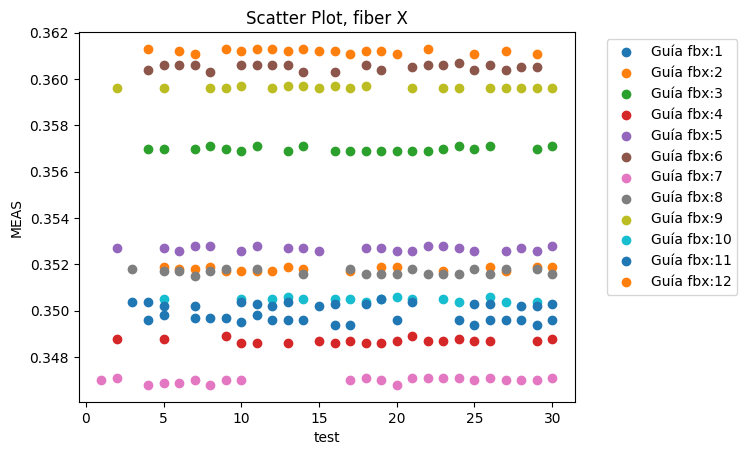

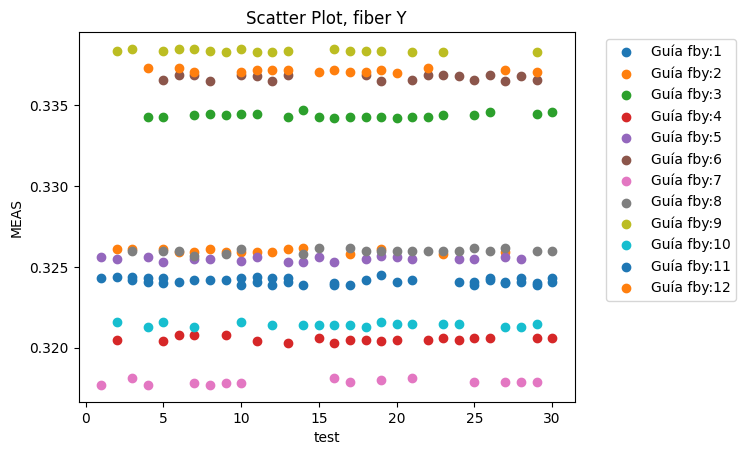

In [7]:
#Filter values by their row z-score
z_df = z_score_filter(df_plus_limits, 1)
#Plot the filtered values
plot_scatter(z_df.iloc[:, :-2], 'x', 'Scatter Plot, fiber X', 'test', 'MEAS', 'Guía fbx:')
plot_scatter(z_df.iloc[:, :-2], 'y', 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Guía fby:')

In [8]:
#Split the dataframe for x fiber and y fiber
x_fiber = z_df[z_df.index % 2 == 0]
y_fiber = z_df[z_df.index % 2 != 0]
#Calculate the new RyR
RyRx, RyRy = RyR(z_df)

RyR Guide fbx 1: 2.199292068470313 % Status: Correct
RyR Guide fbx 2: 1.7047187473802388 % Status: Correct
RyR Guide fbx 3: 1.3161311928103792 % Status: Correct
RyR Guide fbx 4: 1.7598291664488748 % Status: Correct
RyR Guide fbx 5: 1.474867869704265 % Status: Correct
RyR Guide fbx 6: 1.905698526179719 % Status: Correct
RyR Guide fbx 7: 1.8181818181819867 % Status: Correct
RyR Guide fbx 8: 1.8439729194075634 % Status: Correct
RyR Guide fbx 9: 0.7014657762939744 % Status: Correct
RyR Guide fbx 10: 1.2364973189761295 % Status: Correct
RyR Guide fbx 11: 1.7047187473802385 % Status: Correct
RyR Guide fbx 12: 1.2313634776119873 % Status: Correct

RyR Guide fby 1: 4.358958531635491 % Status: Correct
RyR Guide fby 2: 3.063331519767239 % Status: Correct
RyR Guide fby 3: 2.7764760261529737 % Status: Correct
RyR Guide fby 4: 3.516936465912062 % Status: Correct
RyR Guide fby 5: 2.858339598990768 % Status: Correct
RyR Guide fby 6: 3.5307735838274623 % Status: Correct
RyR Guide fby 7: 3.377911442635

In [9]:
print(largest.index[0])

fiber x 1:
